In [2]:
from pyspark import SparkConf , SparkContext
sc.stop()
conf = SparkConf().setMaster("local").setAppName("wordcount")
sc = SparkContext(conf = conf)
sc

def mapper1try(line):
        wordlist = line.split(" ")
        newitem = []
        maplist = []
        maplist.append(wordlist)
        return maplist

def change(line):
    mapp = []
    for i in line:
        i = float(i)
        mapp.append(i)
    return mapp

In [4]:
inf = float("inf")

In [3]:
lines1 = sc.textFile("/Users/huangyushu/Desktop/hw3-kmeans-testcase/data.txt").flatMap(mapper1try)

In [5]:
lines2 = lines1.map(change)

In [112]:
c1= sc.textFile("/Users/huangyushu/Desktop/hw3-kmeans-testcase/c1.txt").flatMap(mapper1try)
c1 = c1.map(change)

In [7]:
def dis(a, b):
    sum = 0
    for i,j in zip(a,b):
#         print (i)
        sum = sum+((i-j)**2)
#         print(sum)
    sum  = sum**0.5
    
    return sum

In [107]:
def dis2(a, b):
    sum = 0
    for i,j in zip(a,b):
#         print (i)
        sum = sum+abs(i-j)
    
    return sum

In [68]:
def cluster(a,b):
    cost = 0
    cluster = []
    for i in range(10):
        cluster.append([])
    mind = inf
    for i in range(4601):
        for j in range(10):
            distant = dis(a[i], b[j])
#             print(distant)
            if distant < mind:
                mind = distant
                flag = j
#                 print(j)
        cluster[flag].append(a[i])
        cost = cost + (dis(a[i],b[flag])**2)
        mind = inf
    print(cost)
    return cluster

In [108]:
def cluster2(a,b):
    cost = 0
    cluster = []
    for i in range(10):
        cluster.append([])
    mind = inf
    for i in range(4601):
        for j in range(10):
            distant = dis2(a[i], b[j])
#             print(distant)
            if distant < mind:
                mind = distant
                flag = j
#                 print(j)
        cluster[flag].append(a[i])
        cost = cost + dis2(a[i],b[flag])
        mind = inf
    print(cost)
    return cluster

In [109]:
def findnew(line):
    new = []
    for i in range(58):
        sum = 0
        for item in line:
            sum = sum+item[i]
        sum = sum/len(line)
        new.append(sum)
    return new 

In [134]:
#manhatan
l = cluster2(lines2.collect(),c1.collect())
l = sc.parallelize(l)
newcent = l.map(findnew)

550117.1420000045


In [135]:
#manhatan
for i in range(19):
    tmp = newcent
    ncl = cluster2(lines2.collect(),tmp.collect())
    ncl = sc.parallelize(ncl)
    newcent = ncl.map(findnew)
c1_anscent2 = newcent

464869.27587929845
470897.3822772998
483914.40917334514
489216.0710034315
487629.6685499822
483711.9232137478
475330.7734932305
474871.2388463643
457232.92011507344
447494.38619734696
450915.0125766772
451250.3670725656
451974.5955397487
451570.3640699583
452739.0113664558
453082.7302871829
450583.67086030025
450368.7493167392
449011.3637255198


In [123]:
c1_anscent2 = c1_anscent2.collect()

In [124]:
for i in range(len(c1_anscent2)):
    for j in range(i):
        print(i+1,',',j+1,'=',dis(c1_anscent2[i],c1_anscent2[j]))

2 , 1 = 2219.1772770509865
3 , 1 = 9948.044077639335
3 , 2 = 7767.945602579569
4 , 1 = 528.6997575475606
4 , 2 = 2734.0498544640413
4 , 3 = 10433.061351319797
5 , 1 = 413.3650612071161
5 , 2 = 2628.4908097297634
5 , 3 = 10361.367486044566
5 , 4 = 221.37279398782263
6 , 1 = 827.7188856579816
6 , 2 = 3044.4778721252733
6 , 3 = 10773.530838116945
6 , 4 = 375.1561884837036
6 , 5 = 415.9899852468605
7 , 1 = 681.0349895443137
7 , 2 = 2898.7128939326617
7 , 3 = 10626.48859681842
7 , 4 = 249.3791882654921
7 , 5 = 270.74879157775905
7 , 6 = 147.04697388149492
8 , 1 = 917.127382961168
8 , 2 = 3133.460130173686
8 , 3 = 10862.965776276442
8 , 4 = 457.25965255434755
8 , 5 = 505.07106661337866
8 , 6 = 89.4909165524104
8 , 7 = 236.51462239245419
9 , 1 = 832.1474343052389
9 , 2 = 1812.4545744763466
9 , 3 = 9340.275232170257
9 , 4 = 1156.5833757939854
9 , 5 = 1171.964205896139
9 , 6 = 1529.4640115204097
9 , 7 = 1391.550421146714
9 , 8 = 1613.555789411286
10 , 1 = 729.0563485517976
10 , 2 = 1491.3573457

In [125]:
for i in range(len(c1_anscent2)):
    for j in range(i):
        print(i+1,',',j+1,'=',dis2(c1_anscent2[i],c1_anscent2[j]))

2 , 1 = 2341.017218605991
3 , 1 = 11929.300151785714
3 , 2 = 9597.441187096774
4 , 1 = 651.187488095238
4 , 2 = 2778.9457620967737
4 , 3 = 12323.287569444445
5 , 1 = 496.33152119047617
5 , 2 = 2830.1445281720426
5 , 3 = 12421.263079999999
5 , 4 = 335.951213
6 , 1 = 947.7432364650634
6 , 2 = 3280.3591681796074
6 , 3 = 12871.483428978225
6 , 4 = 558.4692581658292
6 , 5 = 452.86133068676713
7 , 1 = 770.7373834915085
7 , 2 = 3104.2857711482065
7 , 3 = 12695.554202097901
7 , 4 = 382.4633301282051
7 , 5 = 276.3264914965034
7 , 6 = 177.59316237363976
8 , 1 = 1056.7995006298163
8 , 2 = 3388.9826482565923
8 , 3 = 12979.13318018672
8 , 4 = 667.5332295988935
8 , 5 = 561.8492485408023
8 , 6 = 110.21762404606017
8 , 7 = 287.42970773365636
9 , 1 = 1260.5105607142857
9 , 2 = 2380.460958064516
9 , 3 = 10775.939185714284
9 , 4 = 1653.8258869047618
9 , 5 = 1755.105532761905
9 , 6 = 2205.3073830102894
9 , 7 = 2028.901615784216
9 , 8 = 2314.667454756965
10 , 1 = 737.7135730519481
10 , 2 = 1605.27012870641

In [81]:
l = cluster(lines2.collect(),c1.collect())
l = sc.parallelize(l)
newcent = l.map(findnew)

623660345.3064235


In [82]:
for i in range(19):
    tmp = newcent
    ncl = cluster(lines2.collect(),tmp.collect())
    ncl = sc.parallelize(ncl)
    newcent = ncl.map(findnew)
c1_anscent = newcent

509862908.29754597
485480681.8720084
463997011.6850107
460969266.57299405
460537847.98277014
460313099.65354246
460003523.88940686
459570539.3177354
459021103.3422901
458490656.1919808
457944232.5879742
457558005.1986796
457290136.3523032
457050555.0595639
456892235.61535746
456703630.7370357
456404203.0189769
456177800.54199505
455986871.02734846


In [83]:
c1_anscent = c1_anscent.collect()

In [65]:
for i in range(len(c1_anscent)):
    for j in range(i):
        print(i+1,',',j+1,'=',dis(c1_anscent[i],c1_anscent[j]))

2 , 1 = 692.1578865536187
3 , 1 = 3490.2586403239793
3 , 2 = 2798.8010531589434
4 , 1 = 205.75027883457204
4 , 2 = 897.6589863450828
4 , 3 = 3695.114191079636
5 , 1 = 346.71882253414816
5 , 2 = 1038.8268882911389
5 , 3 = 3836.9066381524567
5 , 4 = 142.43887392408647
6 , 1 = 512.6122467083617
6 , 2 = 1204.0781989863117
6 , 3 = 4002.6890825730284
6 , 4 = 309.50632446700047
6 , 5 = 167.1498001315246
7 , 1 = 444.7310005470825
7 , 2 = 1136.3273438149283
7 , 3 = 3934.8715588311575
7 , 4 = 241.7301145044183
7 , 5 = 99.54554331498562
7 , 6 = 67.91186107588504
8 , 1 = 566.2019922936282
8 , 2 = 1257.4495275592424
8 , 3 = 4056.1355729719103
8 , 4 = 363.2628951046584
8 , 5 = 220.90178372040566
8 , 6 = 53.78989116172683
8 , 7 = 121.63372043718282
9 , 1 = 1282.7708445154385
9 , 2 = 669.8902282318555
9 , 3 = 2294.57964158953
9 , 4 = 1474.9454213642691
9 , 5 = 1615.852353440387
9 , 6 = 1782.2030486002302
9 , 7 = 1715.2531997144126
9 , 8 = 1835.6396718448902
10 , 1 = 307.66912835221507
10 , 2 = 412.076

In [84]:
for i in range(len(c1_anscent)):
    for j in range(i):
        print(i+1,',',j+1,'=',dis2(c1_anscent[i],c1_anscent[j]))

2 , 1 = 728.9243139995409
3 , 1 = 3797.8990780180675
3 , 2 = 3072.8886904466503
4 , 1 = 212.18109038688195
4 , 2 = 935.8853379058191
4 , 3 = 4001.0380519416276
5 , 1 = 374.8904224625678
5 , 2 = 1100.833091013825
5 , 3 = 4170.304532612548
5 , 4 = 171.3651541556152
6 , 1 = 577.4020758222025
6 , 2 = 1303.8957233218873
6 , 3 = 4372.788718801669
6 , 4 = 375.2479208943975
6 , 5 = 204.52292364239253
7 , 1 = 499.1578939470968
7 , 2 = 1225.351713180189
7 , 3 = 4294.952834221333
7 , 4 = 296.25472354226696
7 , 5 = 125.59678617977005
7 , 6 = 79.40168444202222
8 , 1 = 645.7697774866793
8 , 2 = 1372.0922054892176
8 , 3 = 4440.719767637059
8 , 4 = 443.49844537759145
8 , 5 = 272.93491284339433
8 , 6 = 69.58987631971816
8 , 7 = 147.86570909768562
9 , 1 = 1731.0643066429416
9 , 2 = 1005.2930456989247
9 , 3 = 2513.422660256411
9 , 4 = 1934.086959807074
9 , 5 = 2102.8649228110594
9 , 6 = 2306.3802505970657
9 , 7 = 2227.555856782107
9 , 8 = 2374.545430478822
10 , 1 = 406.70122510554586
10 , 2 = 490.9280581

In [115]:
c2= sc.textFile("/Users/huangyushu/Desktop/hw3-kmeans-testcase/c2.txt").flatMap(mapper1try)
c2 = c2.map(change)

In [128]:
#manhattan
m = cluster2(lines2.collect(),c2.collect())
m = sc.parallelize(m)
newcent2 = m.map(findnew)

1433739.3099999938


In [129]:
#manhattan
for i in range(19):
    tmp = newcent2
    ncl = cluster2(lines2.collect(),tmp.collect())
    ncl = sc.parallelize(ncl)
    newcent2 = ncl.map(findnew)
# newcent.collect()
c2_anscent2 = newcent2

1084488.7769648738
973431.7146620394
895934.5925630673
865128.3352940796
845846.6470313473
827219.5827561237
803590.3456011107
756039.5172761244
717332.9025432297
694587.9252526843
684444.5019967925
674574.7475478566
667409.469916026
663556.6278214998
660162.777228758
656041.3222947085
653036.7540731638
651112.4262522653
649689.0131843556


In [131]:
c2_anscent2 = c2_anscent2.collect()

In [132]:
for i in range(len(c2_anscent2)):
    for j in range(i):
        print(i+1,',',j+1,'=',dis(c2_anscent2[i],c2_anscent2[j]))

2 , 1 = 15747.234225995131
3 , 1 = 14100.144687804226
3 , 2 = 11524.505650179837
4 , 1 = 9032.333022974994
4 , 2 = 6743.88410019246
4 , 3 = 9545.879403387185
5 , 1 = 5554.786693382845
5 , 2 = 10192.525007384162
5 , 3 = 10883.382187801386
5 , 4 = 3494.2224155718104
6 , 1 = 2006.7026683699517
6 , 2 = 14474.554115568231
6 , 3 = 12167.79387138704
6 , 4 = 7742.6281172713425
6 , 5 = 4452.971684507903
7 , 1 = 1338.161125522521
7 , 2 = 14412.056615494355
7 , 3 = 13125.351004065811
7 , 4 = 7694.276701483224
7 , 5 = 4219.760574098205
7 , 6 = 1405.1090803330765
8 , 1 = 514.627037539365
8 , 2 = 15239.87707116475
8 , 3 = 13684.606757319763
8 , 4 = 8521.197863130883
8 , 5 = 5047.516256062294
8 , 6 = 1637.7294382123869
8 , 7 = 827.840658014979
9 , 1 = 1571.2434198098995
9 , 2 = 14328.226191823098
9 , 3 = 12643.985638343242
9 , 4 = 7588.404540222487
9 , 5 = 4167.636533016605
9 , 6 = 910.9943878357352
9 , 7 = 566.5510174100833
9 , 8 = 1081.3793348240201
10 , 1 = 3022.6608840606823
10 , 2 = 12731.397634

In [133]:
for i in range(len(c2_anscent2)):
    for j in range(i):
        print(i+1,',',j+1,'=',dis2(c2_anscent2[i],c2_anscent2[j]))

2 , 1 = 15757.691264458323
3 , 1 = 20200.259435786043
3 , 2 = 16003.499
4 , 1 = 9517.668232509728
4 , 2 = 7219.196666666668
4 , 3 = 10690.484333333334
5 , 1 = 5588.853634537063
5 , 2 = 10221.031
5 , 3 = 14613.552
5 , 4 = 3935.2926666666663
6 , 1 = 3281.488246764413
6 , 2 = 16325.2705
6 , 3 = 17521.517666666663
6 , 4 = 9116.0245
6 , 5 = 6110.8325
7 , 1 = 1430.2086778758846
7 , 2 = 14506.48588961039
7 , 3 = 18775.12146103896
7 , 4 = 8090.510188311688
7 , 5 = 4293.5019025974025
7 , 6 = 1855.5799090909088
8 , 1 = 602.9548488263027
8 , 2 = 15335.957402597402
8 , 3 = 19602.262814935064
8 , 4 = 8918.813116883115
8 , 5 = 5123.066808441558
8 , 6 = 2682.5692337662335
8 , 7 = 833.4302824675323
9 , 1 = 2102.553977579326
9 , 2 = 14980.056095890412
9 , 3 = 18111.885424657536
9 , 4 = 7771.22207762557
9 , 5 = 4768.923
9 , 6 = 1358.795894977169
9 , 7 = 674.8275699163852
9 , 8 = 1500.824883695072
10 , 1 = 3211.4557560606645
10 , 2 = 12922.931357142857
10 , 3 = 16995.133535714285
10 , 4 = 6312.5300119047

In [85]:
m = cluster(lines2.collect(),c2.collect())
m = sc.parallelize(m)
newcent2 = m.map(findnew)

438747790.027918


In [87]:
for i in range(19):
    tmp = newcent2
    ncl = cluster(lines2.collect(),tmp.collect())
    ncl = sc.parallelize(ncl)
    newcent2 = ncl.map(findnew)
# newcent.collect()
c2_anscent = newcent2

249803933.62600294
194494814.40631393
169804841.45154336
156295748.80627596
149094208.10896608
142508531.61961588
132303869.40653005
117170969.83719078
108547377.17857017
102237203.31799614
98278015.74975717
95630226.12177444
93793314.05119292
92377131.96821108
91541606.25423913
91045573.8304242
90752240.10140836
90470170.18122767
90216416.17563146


In [88]:
c2_anscent = c2_anscent.collect()

In [80]:
for i in range(len(c2_anscent)):
    for j in range(i):
        print(i+1,',',j+1,'=',dis(c2_anscent[i],c2_anscent[j]))

2 , 1 = 15760.12247224593
3 , 1 = 14110.83439088334
3 , 2 = 11524.505650179837
4 , 1 = 9045.32023455239
4 , 2 = 6743.88410019246
4 , 3 = 9545.879403387185
5 , 1 = 5567.684524118405
5 , 2 = 10192.525007384162
5 , 3 = 10883.382187801386
5 , 4 = 3494.2224155718104
6 , 1 = 1924.6240815733204
6 , 2 = 14455.11937212132
6 , 3 = 12233.959804503613
6 , 4 = 7718.222009696623
6 , 5 = 4404.562590797219
7 , 1 = 1100.8590503593277
7 , 2 = 14682.450992891092
7 , 3 = 13208.002933714424
7 , 4 = 7957.775949135465
7 , 5 = 4492.458214360271
7 , 6 = 1182.864189045907
8 , 1 = 402.89054961102914
8 , 2 = 15362.417960805125
8 , 3 = 13786.484182516106
8 , 4 = 8644.807041005524
8 , 5 = 5169.9372911256405
8 , 6 = 1615.7882361392917
8 , 7 = 698.4881359277906
9 , 1 = 2105.4425755929597
9 , 2 = 13674.707531226235
9 , 3 = 12508.95738096874
9 , 4 = 6947.820636329124
9 , 5 = 3488.1585187816186
9 , 6 = 1313.3274934048693
9 , 7 = 1010.1976652126849
9 , 8 = 1702.7926583344838
10 , 1 = 3169.003772849924
10 , 2 = 12597.0395

In [89]:
for i in range(len(c2_anscent)):
    for j in range(i):
        print(i+1,',',j+1,'=',dis2(c2_anscent[i],c2_anscent[j]))

2 , 1 = 15772.614899885255
3 , 1 = 20215.645980206544
3 , 2 = 16003.499
4 , 1 = 9533.17084939759
4 , 2 = 7219.196666666668
4 , 3 = 10690.484333333334
5 , 1 = 5604.200489099255
5 , 2 = 10221.031
5 , 3 = 14613.552
5 , 4 = 3935.2926666666663
6 , 1 = 3088.0543184882386
6 , 2 = 16105.3475
6 , 3 = 17509.90275
6 , 4 = 8896.389208333332
6 , 5 = 5893.070125
7 , 1 = 1311.039156985083
7 , 2 = 14909.169510714286
7 , 3 = 18912.605410714285
7 , 4 = 8228.355075
7 , 5 = 4696.975382142857
7 , 6 = 1781.8226714285715
8 , 1 = 471.26571999995156
8 , 2 = 15434.460040787624
8 , 3 = 19748.93569338959
8 , 4 = 9065.404333333334
8 , 5 = 5221.252805907173
8 , 6 = 2619.8113862517584
8 , 7 = 840.7225236939923
9 , 1 = 2369.4121590413606
9 , 2 = 13950.575945454546
9 , 3 = 17851.806836363638
9 , 4 = 7168.732963636363
9 , 5 = 3737.707
9 , 6 = 2162.8021454545456
9 , 7 = 1068.9399724025977
9 , 8 = 1901.208756322721
10 , 1 = 3349.657086008631
10 , 2 = 12776.883065217391
10 , 3 = 16873.243673913043
10 , 4 = 6190.6793115942

In [37]:
# import pandas as pd
# from pandas import DataFrame
# l = []
# for i in range(20):
#     l.append(i+1)
# df = pd.DataFrame(c1cost)
# df['Round'] = l
# df['c1'] = c1cost
# df['c2'] = c2cost
# df = df.drop([0],axis = 1)
# df

,Round,c1,c2
0,1,6.236603e+08,4.387478e+08
1,2,5.098629e+08,2.498039e+08
2,3,4.854807e+08,1.944948e+08
3,4,4.639970e+08,1.698048e+08
4,5,4.609693e+08,1.562957e+08
5,6,4.605378e+08,1.490942e+08
6,7,4.603131e+08,1.425085e+08
7,8,4.600035e+08,1.323039e+08
8,9,4.595705e+08,1.171710e+08
9,10,4.590211e+08,1.085474e+08


In [95]:
# import pandas as pd
# from pandas import DataFrame
# mandf = pd.DataFrame(c1cost)
# mandf['c1'] = man_c1cost
# mandf['c2'] = man_c2cost
# mandf = mandf.drop([0],axis = 1)
# mandf

,c1,c2
0,550117.142000,1.433739e+06
1,464869.275879,1.084489e+06
2,470897.382277,9.734317e+05
3,483914.409173,8.959346e+05
4,489216.071003,8.651283e+05
5,487629.668550,8.458466e+05
6,483711.923214,8.272196e+05
7,475330.773493,8.035903e+05
8,474871.238846,7.560395e+05
9,457232.920115,7.173329e+05


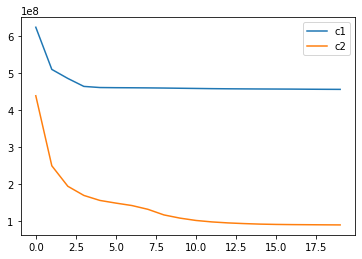

In [106]:
# import matplotlib.pyplot as plt
# plt.plot(df[['c1', 'c2']])
# plt.legend(['c1','c2'], loc='upper right')

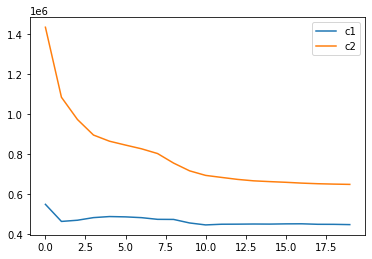

In [105]:
# plt.plot(mandf[['c1', 'c2']])
# plt.legend(['c1','c2'], loc='upper right')

In [93]:
man_c1cost = [
550117.1420000045,
464869.27587929845,
470897.3822772998,
483914.40917334514,
489216.0710034315,
487629.6685499822,
483711.9232137478,
475330.7734932305,
474871.2388463643,
457232.92011507344,
447494.38619734696,
450915.0125766772,
451250.3670725656,
451974.5955397487,
451570.3640699583,
452739.0113664558,
453082.7302871829,
450583.67086030025,
450368.7493167392,
449011.3637255198
]

In [136]:
man_c2cost = [
1433739.3099999938,
1084488.7769648738,
973431.7146620394,
895934.5925630673,
865128.3352940796,
845846.6470313473,
827219.5827561237,
803590.3456011107,
756039.5172761244,
717332.9025432297,
694587.9252526843,
684444.5019967925,
674574.7475478566,
667409.469916026,
663556.6278214998,
660162.777228758,
656041.3222947085,
653036.7540731638,
651112.4262522653,
649689.0131843556
]

In [19]:
c2cost = [
438747790.027918,
249803933.62600294,
194494814.40631393,
169804841.45154336,
156295748.80627596,
149094208.10896608,
142508531.61961588,
132303869.40653005,
117170969.83719078,
108547377.17857017,
102237203.31799614,
98278015.74975717,
95630226.12177444,
93793314.05119292,
92377131.96821108,
91541606.25423913,
91045573.8304242,
90752240.10140836,
90470170.18122767,
90216416.17563146
]

In [20]:
c1cost = [
623660345.3064235,
509862908.29754597,
485480681.8720084,
463997011.6850107,
460969266.57299405,
460537847.98277014,
460313099.65354246,
460003523.88940686,
459570539.3177354,
459021103.3422901,
458490656.1919808,
457944232.5879742,
457558005.1986796,
457290136.3523032,
457050555.0595639,
456892235.61535746,
456703630.7370357,
456404203.0189769,
456177800.54199505,
455986871.02734846
]

In [101]:
c1_percentage_improvement = abs(455986871.02734846-623660345.3064235)/623660345.3064235
c1_percentage_improvement

0.26885383292518295

In [102]:
c2_percentage_improvement = abs(90216416.17563146-438747790.027918)/438747790.027918
c2_percentage_improvement

0.7943775029159899

In [121]:
c1_percentage_improvement = abs(449011.3637255198-550117.1420000045)/550117.1420000045
c1_percentage_improvement

0.18378954327237434

In [122]:
c2_percentage_improvement = abs(649689.0131843556-1433739.3099999938)/1433739.3099999938
c2_percentage_improvement

0.5468569434813374